<h1 align="center">Student Performance</h1>

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

**Variables:**

- **Hours Studied:** The total number of hours spent studying by each student.

- **Previous Scores:** The scores obtained by students in previous tests.
  
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
  
- **Sleep Hours:** The average number of hours of sleep the student had per day.

- **Sample Question Papers Practiced:** The number of sample question papers the student practiced.

**Target Variable:**

**Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

### Read Data

In [6]:
df=pd.read_csv("/Student_Performance.csv")

## Explorartory Data Analysis

# New Section

In [14]:
df.shape

(10000, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [16]:
df.describe(include="all")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [ ]:
# previous score have the more outliers than the others .

In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

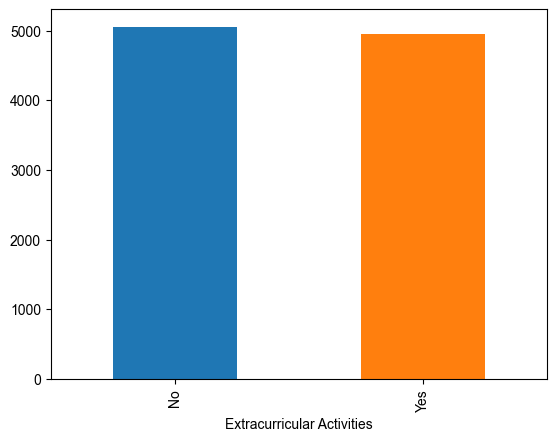

In [ ]:
df["Extracurricular Activities"].value_counts().plot(kind="bar",color=sns.color_palette("tab10"))
sns.set_style("darkgrid")
plt.show()

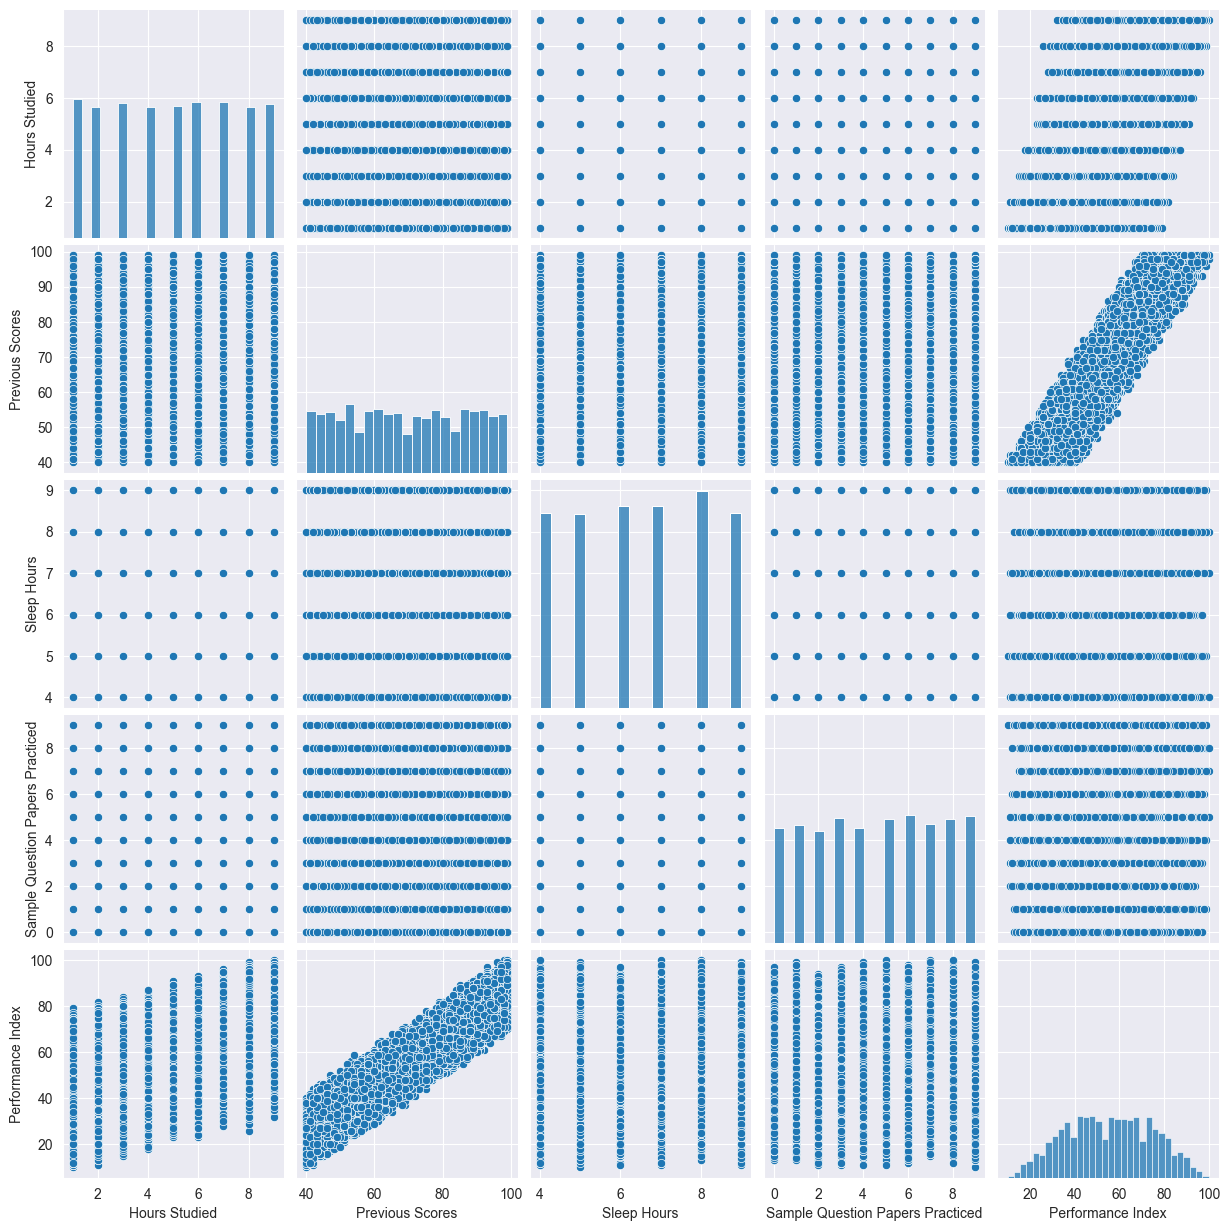

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].apply(lambda x:1 if x=="Yes" else 0)

In [18]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: ylabel='Frequency'>

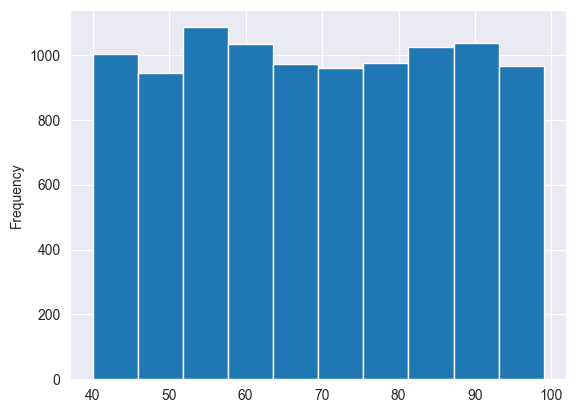

In [ ]:
df["Previous Scores"].plot(kind="hist")

In [ ]:
from scipy.stats import probplot,shapiro,anderson,normaltest,jarque_bera

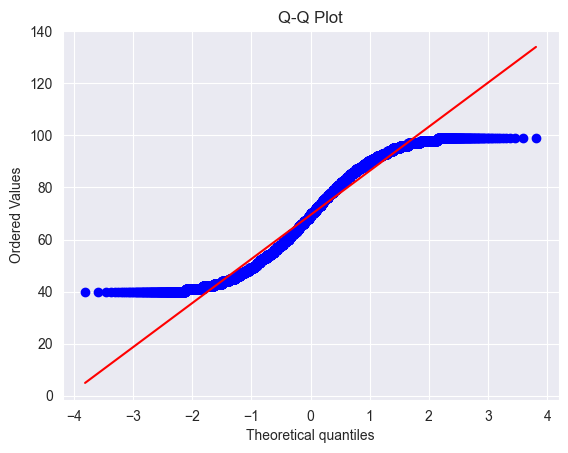

In [ ]:
probplot(df["Previous Scores"], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
stat, p = shapiro(df["Previous Scores"])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.953, p=0.000


C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
result =anderson(df["Previous Scores"], dist='norm')
print('Anderson-Darling Test: Statistic=%.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print('%.3f: %.3f' % (sl, cv))

Anderson-Darling Test: Statistic=118.287
15.000: 0.576
10.000: 0.656
5.000: 0.787
2.500: 0.918
1.000: 1.092


In [ ]:
stat, p =normaltest(df["Previous Scores"])
print('D\'Agostino\'s K-squared Test: Statistics=%.3f, p=%.3f' % (stat, p))

D'Agostino's K-squared Test: Statistics=9862.056, p=0.000


In [ ]:
stat, p =jarque_bera(df["Previous Scores"])
print('Jarque-Bera Test: Statistics=%.3f, p=%.3f' % (stat, p))

Jarque-Bera Test: Statistics=613.337, p=0.000


## split the data

In [8]:
X_train,X_test,y_train,y_test=train_test_split(df[df.columns.to_list()[:-1]],df[df.columns.to_list()[-1]],test_size=0.2,random_state=42)

### Scale Data

In [9]:
rs=RobustScaler()
X_train=pd.DataFrame(rs.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(rs.transform(X_test),columns=X_test.columns)

### Build Model

In [ ]:
def model_summary(model):
    y_hat=model.fit(X_train,y_train).predict(X_test)
    print("The R-Square of the model is :",r2_score(y_test,y_hat))
    print("The mean square of the model is :",mean_squared_error(y_test,y_hat))

In [ ]:
model=LinearRegression()

In [ ]:
model_summary(model)

The R-Square of the model is : 0.9889832909573145
The mean square of the model is : 4.082628398521857


In [ ]:
model_summary(Ridge())

The R-Square of the model is : 0.9889784331750664
The mean square of the model is : 4.084428620319757


In [ ]:
model_summary(Lasso())

The R-Square of the model is : 0.9699516265234663
The mean square of the model is : 11.135479970412554


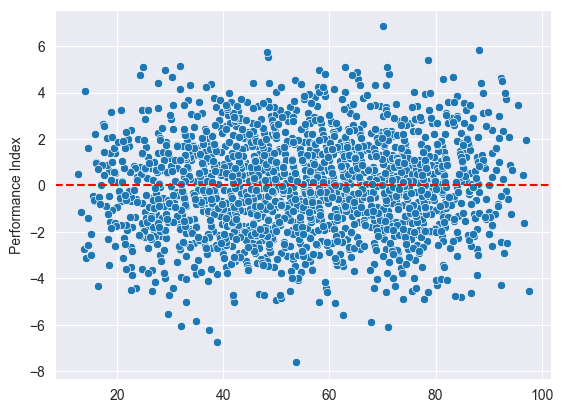

In [ ]:
sns.scatterplot(x=Ridge().fit(X_train,y_train).predict(X_test),y=y_test-Ridge().fit(X_train,y_train).predict(X_test))
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [ ]:
print("The R-Square for the training data",r2_score(y_train,Ridge().fit(X_train,y_train).predict(X_train)))
print("The R-Square for the testing data",r2_score(y_test,Ridge().fit(X_train,y_train).predict(X_test)))

The R-Square for the training data 0.9886897428145149
The R-Square for the testing data 0.9889784331750664


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor


In [20]:
def model_summary(model):
  y_hat=model.fit(X_train,y_train).predict(X_test)
  print("The R-Square of the model is :",r2_score(y_test,y_hat))
  print("The mean square of the model is :",mean_squared_error(y_test,y_hat))

In [23]:
model=DecisionTreeRegressor()
model_summary(model)

The R-Square of the model is : 0.9764495548589587
The mean square of the model is : 8.727444444444446


In [24]:
model=RandomForestRegressor()
model_summary(model)

The R-Square of the model is : 0.9860548002157992
The mean square of the model is : 5.167883479671241


In [25]:
model=GradientBoostingRegressor()
model_summary(model)

The R-Square of the model is : 0.9882223120685143
The mean square of the model is : 4.364635848301435


In [26]:
model=KNeighborsRegressor()
model_summary(model)

The R-Square of the model is : 0.9765727234441871
The mean square of the model is : 8.681799999999999


In [27]:
model=SVR()
model_summary(model)

The R-Square of the model is : 0.98575334717303
The mean square of the model is : 5.279597490494414


In [28]:
model=AdaBoostRegressor()
model_summary(model)

The R-Square of the model is : 0.9760060043557023
The mean square of the model is : 8.891817659145552


In [29]:
model=BaggingRegressor()
model_summary(model)

The R-Square of the model is : 0.9853992241075926
The mean square of the model is : 5.410830227777778


In [30]:
model=ExtraTreesRegressor()
model_summary(model)

The R-Square of the model is : 0.9830141629737709
The mean square of the model is : 6.2946983847222215


In [31]:
model=SGDRegressor()
model_summary(model)

The R-Square of the model is : 0.9889633498489929
The mean square of the model is : 4.090018276462385


In [34]:
model=VotingRegressor([("dt",DecisionTreeRegressor()),("rf",RandomForestRegressor()),("gb",GradientBoostingRegressor())])
model_summary(model)

The R-Square of the model is : 0.9864211475830561
The mean square of the model is : 5.032120598080055


In [35]:
model=StackingRegressor([("dt",DecisionTreeRegressor()),("rf",RandomForestRegressor()),("gb",GradientBoostingRegressor())])
model_summary(model)

The R-Square of the model is : 0.9883534750143418
The mean square of the model is : 4.316028812807055


In [38]:
print("The R-Square for the training data",r2_score(y_train,SGDRegressor().fit(X_train,y_train).predict(X_train)))
print("The R-Square for the testing data",r2_score(y_test,SGDRegressor().fit(X_train,y_train).predict(X_test)))

The R-Square for the training data 0.9886850516452292
The R-Square for the testing data 0.9889335144392262


In [39]:
# prompt: Hyperparametric tunning of SGDRegressor

from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
}

grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

print("R-squared score on test data:", r2_score(y_test, best_model.predict(X_test)))
print("R-squared score on train data:", r2_score(y_train, best_model.predict(X_train)))



Best parameters: {'alpha': 0.0001, 'loss': 'squared_epsilon_insensitive', 'penalty': 'elasticnet'}
Best score: 0.9886559495155305
R-squared score on test data: 0.9889808535852989
R-squared score on train data: 0.9886890488241739


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
280 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 1582, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-p

In [10]:
# prompt: Build neural network

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)

y_pred = model.predict(X_test)

print("R-squared score on test data:", r2_score(y_test, y_pred))
print("R-squared score on train data:", r2_score(y_train, model.predict(X_train)))


Epoch 1/100
250/250 [==============================] - 4s 3ms/step - loss: 854.0331
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 21.0139
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 11.1521
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 6.9223
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 5.2397
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 4.7676
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 4.6003
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 4.5634
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 4.4765
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 4.4754
Epoch 11/100
250/250 [==============================] - 1s 3ms/step - loss: 4.4188
Epoch 12/100
250/250 [==============================] - 1s 3ms/step - loss: 4.4329
Epoch 13/

In [21]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [22]:
# prompt: hyperparametric tuning using keras tuner

import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), loss='mean_squared_error')
    return model

tuner = kt.Hyperband(model_builder, objective='val_loss', max_epochs=10)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

print('Best Hyperparameters:')
print(best_hyperparameters)

best_model.summary()

best_model.fit(X_train, y_train, epochs=20, batch_size=32,initial_epoch=10,validation_data=(X_test, y_test))

print("R-squared score on test data:", r2_score(y_test, best_model.predict(X_test)))
print("R-squared score on train data:", r2_score(y_train, best_model.predict(X_train)))


Trial 30 Complete [00h 00m 10s]
val_loss: 4.691188335418701

Best val_loss So Far: 4.196294784545898
Total elapsed time: 00h 03m 34s
Best Hyperparameters:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               1344      
                                                                 
 dense_1 (Dense)             (None, 224)               50400     
                                                                 
 dense_2 (Dense)             (None, 1)                 225       
                                                                 
Total params: 51969 (203.00 KB)
Trainable params: 51969 (203.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 11/20
250/250 [==============================] - 2s 4ms/step - loss: 5.0460 - val_loss: 4.2935
Epoch 12/20
250/250 [=====

In [16]:
from sklearn.metrics import get_scorer_names

In [17]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',